In [38]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
experiments = pd.read_csv("../results/experiments.csv")

In [40]:
experiments

,RUN,modelname,data,num_units,num_blocks,epochs,batch_size,learningrate,optimizer,dropout,...,AE_1,AE_2,AE_3,AE_4,AE_5,TC_t_1,TC_t_2,TC_t_3,TC_t_4,TC_t_5
0,0,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,13.193420,12.971055,13.480948,13.424916,14.250611,0.0,0.401425,0.361498,0.223038,0.145159
1,1,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,13.542580,13.167601,13.613719,13.551432,14.365966,0.0,0.716537,0.181285,0.111100,0.073158
2,2,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,13.103835,12.987243,13.574849,13.606878,14.469911,0.0,0.514523,0.143945,0.103640,0.133015
3,3,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,13.301361,12.813811,13.344928,13.347926,14.265526,0.0,0.837860,0.386102,0.190290,0.142966
4,4,LSTM,sepsis,100,2,200,1024,0.10,NADAM,0.2,...,12.972703,13.001880,13.558743,13.583575,14.340341,0.0,0.755476,0.215686,0.177896,0.165955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,LSTM,hospital_billing,100,2,200,128,0.01,NADAM,0.2,...,67.993587,44.346182,41.978316,39.119387,42.381532,0.0,1.834878,2.109112,1.580696,2.433303
156,156,LSTM,hospital_billing,100,2,200,128,0.01,NADAM,0.2,...,70.469499,44.973510,41.908268,39.532631,42.002239,0.0,1.708861,1.013340,2.086441,2.173564
157,157,LSTM,hospital_billing,100,2,200,128,0.01,NADAM,0.2,...,69.835864,45.143645,41.554904,39.034665,42.082421,0.0,1.370082,1.373548,1.908190,2.323803
158,158,LSTM,hospital_billing,100,2,200,128,0.01,NADAM,0.2,...,69.052659,44.989154,41.387211,38.958338,42.693385,0.0,1.951126,1.625852,2.052640,4.442858


In [41]:
experiments.columns

Index(['RUN', 'modelname', 'data', 'num_units', 'num_blocks', 'epochs',
       'batch_size', 'learningrate', 'optimizer', 'dropout', 'early_stop',
       'lr_reduce', 'sgd_momentum', 'loss_function', 'alpha', 'beta', 'gamma',
       'n_estimators', 'max_depth', 'eta', 'subsample', 'colsample_bytree',
       'y_transformation', 'sim_save_eventlog', 'sim_statespace_size',
       'sim_number_of_traces', 'sim_process_entropy', 'sim_process_type',
       'sim_process_memory', 'sim_med_ent_e_steps',
       'sim_med_ent_n_transitions', 'sim_med_ent_max_trials',
       'sim_inter_arrival_time', 'sim_process_stability_scale',
       'sim_resource_availability_p', 'sim_resource_availability_n',
       'sim_resource_availability_m', 'sim_activity_duration_lambda_range',
       'sim_deterministic_offset_W', 'Deterministic_offset_u',
       'data_inference_tables', 'data_last_state', 'data_n_traces',
       'data_max_prefix_length', 'data_min_prefix_length', 'data_split_mode',
       'data_train_ra

In [42]:
res_table = {"RUN":[],
             "data":[],
             "loss_function":[],
            "TC":[]}

for i in experiments.RUN:
    #Load data objects to get the inference table
    file = "experiment_"+str(i)
    with open('../results/'+file+'.pickle', 'rb') as handle:
        data_objects = pickle.load(handle)
    print(file)
    
    # get inference table for MAE calculation
    inf_test = data_objects["inference_test"]
    
       
    # get actual trace lengths
    #inf_test = get_max_prefix(inf_test)
    inf_test = inf_test.loc[inf_test.prefix_number != 1]
       
    
    res_table["RUN"].append(i)
    res_table["data"].append(experiments.loc[experiments.RUN == i,"data"].values[0])
    res_table["loss_function"].append(experiments.loc[experiments.RUN == i,"loss_function"].values[0])
    res_table["TC"].append(np.mean(inf_test["TC_t"]))
   
res_table = pd.DataFrame(res_table)

experiment_0
experiment_1
experiment_2
experiment_3
experiment_4
experiment_5
experiment_6
experiment_7
experiment_8
experiment_9
experiment_10
experiment_11
experiment_12
experiment_13
experiment_14
experiment_15
experiment_16
experiment_17
experiment_18
experiment_19
experiment_20
experiment_21
experiment_22
experiment_23
experiment_24
experiment_25
experiment_26
experiment_27
experiment_28
experiment_29
experiment_30
experiment_31
experiment_32
experiment_33
experiment_34
experiment_35
experiment_36
experiment_37
experiment_38
experiment_39
experiment_40
experiment_41
experiment_42
experiment_43
experiment_44
experiment_45
experiment_46
experiment_47
experiment_48
experiment_49
experiment_50
experiment_51
experiment_52
experiment_53
experiment_54
experiment_55
experiment_56
experiment_57
experiment_58
experiment_59
experiment_60
experiment_61
experiment_62
experiment_63
experiment_64
experiment_65
experiment_66
experiment_67
experiment_68
experiment_69
experiment_70
experiment_71
ex

In [43]:
res_table

,RUN,data,loss_function,TC
0,0,sepsis,MAE,0.204148
1,1,sepsis,MAE,0.159300
2,2,sepsis,MAE_Mtd,0.196810
3,3,sepsis,MAE_Mtd,0.256641
4,4,sepsis,MAE_Ptd,0.273855
...,...,...,...,...
155,155,hospital_billing,MAE_Etd,2.174079
156,156,hospital_billing,MAE,2.027185
157,157,hospital_billing,MAE_Mtd,1.957760
158,158,hospital_billing,MAE_Etd,2.523790


# Average TC

In [44]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    
    ci = np.round(h,2)
    mean = np.round(m,3)
    string = str(mean)+ " ! " +str(ci)
    return string

#filter unwanted experiments
subset = res_table

#crosstab
df = pd.pivot_table(subset, 
                    index='loss_function', 
                    columns="data", 
                    values="TC",
                    aggfunc=mean_confidence_interval)

# change order
df = df[['sepsis', 'helpdesk', 'traffic_fines', 'hospital_billing']]


# sort the table
sorter = ['MAE', 'MAE_Etd', 'MAE_Ptd', 'MAE_Mtd']
df.sort_values(by="loss_function", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)


string = str((df.to_latex(index=True)))
string = string.replace('!', '$\pm$')
string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace('sepsis', 'Sepsis')
string = string.replace('helpdesk', 'Helpdesk')
string = string.replace('traffic\_fines', 'Traffic fines')
string = string.replace('hospital\_billing', 'Hospital billing')

string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")


string = string.replace("lllll","|l|l|l|l|l|")

string = string.replace("data","Loss function")

string = string.replace("loss\_function &            &                &               &                  \\","")

df

C:\Users\Mike\AppData\Local\Temp\ipykernel_1932\2652284882.py:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str((df.to_latex(index=True)))


data,sepsis,helpdesk,traffic_fines,hospital_billing
loss_function,,,,
MAE,0.17 ! 0.02,0.272 ! 0.1,2.137 ! 0.92,1.982 ! 0.1
MAE_Etd,0.189 ! 0.02,0.427 ! 0.13,3.004 ! 1.18,2.07 ! 0.23
MAE_Ptd,0.207 ! 0.03,0.302 ! 0.2,2.447 ! 0.7,2.162 ! 0.25
MAE_Mtd,0.203 ! 0.03,0.408 ! 0.19,2.768 ! 1.74,2.032 ! 0.14


In [45]:
print(string)

\begin{tabular}{|l|l|l|l|l|}
\hline
Loss function &        Sepsis &      Helpdesk & Traffic fines & Hospital billing \\
loss\_function &               &               &               &                  \\
\hline
MAE           &   0.17 $\pm$ 0.02 &   0.272 $\pm$ 0.1 &  2.137 $\pm$ 0.92 &      1.982 $\pm$ 0.1 \\
$MAE_{EtD}$       &  0.189 $\pm$ 0.02 &  0.427 $\pm$ 0.13 &  3.004 $\pm$ 1.18 &      2.07 $\pm$ 0.23 \\
$MAE_{PtD}$       &  0.207 $\pm$ 0.03 &   0.302 $\pm$ 0.2 &   2.447 $\pm$ 0.7 &     2.162 $\pm$ 0.25 \\
$MAE_{MtD}$       &  0.203 $\pm$ 0.03 &  0.408 $\pm$ 0.19 &  2.768 $\pm$ 1.74 &     2.032 $\pm$ 0.14 \\
\hline
\end{tabular}



In [46]:
def f_test(group1, group2, log_trans=False):
    
    #log transform
    if log_trans == True:
        group1 = np.log(1+group1)
        group2 = np.log(1+group2)
    
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value
  

In [47]:
datasets = ['sepsis', 'helpdesk', 'traffic_fines', 'hospital_billing']
loss_functions = ['MAE_Mtd', 'MAE_Ptd', 'MAE_Etd']

res = {"event_log":[],
      "loss_function":[],
      "f_value":[],
      "p_value":[]}

#do a comparison for each dataset
for dataset in datasets:
    results = res_table.loc[res_table.data == dataset]
    
    #do a comparison with MAE for each of the three losses
    for loss in loss_functions:
        
        #get MAE vectors, n = 10
        baseline = results.loc[results.loss_function == "MAE","TC"]
        loss_i = results.loc[results.loss_function == loss,"TC"]
        
        #perform f_test:
        f_value, p_value = f_test(baseline.values, loss_i.values, log_trans=False)
        
        #append results
        res["event_log"].append(dataset)
        res["loss_function"].append(loss)
        res["f_value"].append(np.round(f_value,decimals=3))
        res["p_value"].append(np.round(p_value,decimals=3))
res = pd.DataFrame(res)

In [48]:
res

,event_log,loss_function,f_value,p_value
0,sepsis,MAE_Mtd,0.720,0.684
1,sepsis,MAE_Ptd,0.576,0.788
2,sepsis,MAE_Etd,1.206,0.393
3,helpdesk,MAE_Mtd,0.300,0.956
4,helpdesk,MAE_Ptd,0.266,0.969
5,helpdesk,MAE_Etd,0.653,0.733
6,traffic_fines,MAE_Mtd,0.281,0.964
7,traffic_fines,MAE_Ptd,1.756,0.207
8,traffic_fines,MAE_Etd,0.613,0.761
9,hospital_billing,MAE_Mtd,0.512,0.833


In [49]:
string = str((res.to_latex(index=False)))
#string = string.replace('!', '$\pm$')

string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace("MAE           &","$MAE$           &")
string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")

string = string.replace("llrr","|l|l|r|r|")

string = string.replace("loss\_function","Loss function")
string = string.replace("       event\_log","Event-log")
string = string.replace("  f\_value "," F-value ")
string = string.replace("  p\_value "," P-value ")

string = string.replace('sepsis', 'Sepsis')
string = string.replace('helpdesk', 'Helpdesk')
string = string.replace('traffic\_fines', 'Traffic fines')
string = string.replace('hospital\_billing', 'Hospital billing')

print(string)

\begin{tabular}{|l|l|r|r|}
\hline
Event-log & Loss function & F-value & P-value \\
\hline
          Sepsis &       $MAE_{MtD}$ &    0.720 &    0.684 \\
          Sepsis &       $MAE_{PtD}$ &    0.576 &    0.788 \\
          Sepsis &       $MAE_{EtD}$ &    1.206 &    0.393 \\
        Helpdesk &       $MAE_{MtD}$ &    0.300 &    0.956 \\
        Helpdesk &       $MAE_{PtD}$ &    0.266 &    0.969 \\
        Helpdesk &       $MAE_{EtD}$ &    0.653 &    0.733 \\
   Traffic fines &       $MAE_{MtD}$ &    0.281 &    0.964 \\
   Traffic fines &       $MAE_{PtD}$ &    1.756 &    0.207 \\
   Traffic fines &       $MAE_{EtD}$ &    0.613 &    0.761 \\
Hospital billing &       $MAE_{MtD}$ &    0.512 &    0.833 \\
Hospital billing &       $MAE_{PtD}$ &    0.154 &    0.995 \\
Hospital billing &       $MAE_{EtD}$ &    0.187 &    0.990 \\
\hline
\end{tabular}



C:\Users\Mike\AppData\Local\Temp\ipykernel_1932\1477497820.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str((res.to_latex(index=False)))


# TC_t by timestep

In [50]:
#list(range(2,len(TC_t)+2))

In [51]:
earliness = []

for run in experiments.RUN:
    sub = experiments.loc[experiments.RUN == run]
    
    loss_function = sub.loss_function.values[0]
    data = sub.data.values[0]
    
    TC_t = [sub.TC_t_2.values[0],
              sub.TC_t_3.values[0],
              sub.TC_t_4.values[0],
              sub.TC_t_5.values[0]]
    
    ear_i = pd.DataFrame({"RUN":[run]*len(TC_t),
                          "loss_function":[loss_function]*len(TC_t),
                          "data":[data]*len(TC_t),
                          "event_number":list(range(2,len(TC_t)+2)),
                          "TC_t":TC_t})
    earliness.append(ear_i)

In [52]:
earliness = pd.concat(earliness)
earliness

,RUN,loss_function,data,event_number,TC_t
0,0,MAE,sepsis,2,0.401425
1,0,MAE,sepsis,3,0.361498
2,0,MAE,sepsis,4,0.223038
3,0,MAE,sepsis,5,0.145159
0,1,MAE,sepsis,2,0.716537
...,...,...,...,...,...
3,158,MAE_Etd,hospital_billing,5,4.442858
0,159,MAE_Etd,hospital_billing,2,2.139991
1,159,MAE_Etd,hospital_billing,3,1.075077
2,159,MAE_Etd,hospital_billing,4,1.784055


In [53]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    
    ci = np.round(h,2)
    mean = np.round(m,2)
    string = str(mean)+ " ! " +str(ci)
    return string


subset = earliness

df = pd.pivot_table(subset, 
                    index=["event_number",'loss_function'], 
                    columns="data", 
                    values="TC_t",
                    aggfunc=mean_confidence_interval)


# change order
df = df[['sepsis', 'helpdesk', 'traffic_fines', 'hospital_billing']]

string = str((df.to_latex(index=True)))
string = string.replace('!', '$\pm$')
string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace('sepsis', 'Sepsis')
string = string.replace('helpdesk', 'Helpdesk')
string = string.replace('traffic\_fines', 'Traffic fines')
string = string.replace('hospital\_billing', 'Hospital billing')

string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")
string = string.replace("& MAE &","& $MAE$ &")



string = string.replace("llllll","|l|l|l|l|l|l|")

string = string.replace("loss\_function","Loss function")

string = string.replace("event\_number","Prefix")
string = string.replace("data","")


df

C:\Users\Mike\AppData\Local\Temp\ipykernel_1932\798793725.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str((df.to_latex(index=True)))


data                             sepsis     helpdesk traffic_fines  \
event_number loss_function                                           
2            MAE            0.55 ! 0.07   0.3 ! 0.21   0.47 ! 0.48   
             MAE_Etd        0.54 ! 0.17  0.31 ! 0.19   1.54 ! 1.54   
             MAE_Mtd        0.55 ! 0.11  0.33 ! 0.19   1.05 ! 0.65   
             MAE_Ptd          0.6 ! 0.2  0.14 ! 0.12   0.57 ! 0.72   
3            MAE            0.21 ! 0.06  0.27 ! 0.11   2.53 ! 1.68   
             MAE_Etd        0.26 ! 0.07   0.61 ! 0.2   3.33 ! 1.61   
             MAE_Mtd        0.24 ! 0.07  0.51 ! 0.28    3.77 ! 4.7   
             MAE_Ptd        0.28 ! 0.07  0.52 ! 0.39   3.56 ! 1.96   
4            MAE            0.12 ! 0.03  0.23 ! 0.07   2.13 ! 1.42   
             MAE_Etd        0.12 ! 0.02   0.25 ! 0.1   2.63 ! 2.55   
             MAE_Mtd        0.13 ! 0.03   0.3 ! 0.17    2.2 ! 1.79   
             MAE_Ptd        0.15 ! 0.03  0.17 ! 0.11   1.81 ! 1.05   
5            MAE             0.1 ! 0.02  0.25 ! 0.12   2.32 ! 0.61   
             MAE_Etd        0.11 ! 0.03  0.53 ! 0.17   2.61 ! 0.72   
             MAE_Mtd        0.12 ! 0.03  0.55 ! 0.25   3.82 ! 2.71   
             MAE_Ptd        0.13 ! 0.03   0.3 ! 0.21     2.1 ! 1.0   

data                       hospital_billing  
event_number loss_function                   
2            MAE                2.18 ! 0.38  
             MAE_Etd            2.06 ! 0.33  
             MAE_Mtd            2.09 ! 0.42  
             MAE_Ptd            2.04 ! 0.38  
3            MAE                1.16 ! 0.21  
             MAE_Etd            1.38 ! 0.26  
             MAE_Mtd             1.29 ! 0.2  
             MAE_Ptd             1.34 ! 0.3  
4            MAE                 1.5 ! 0.22  
             MAE_Etd            1.51 ! 0.26  
             MAE_Mtd            1.57 ! 0.25  
             MAE_Ptd            1.79 ! 0.34  
5            MAE                2.08 ! 0.34  
             MAE_Etd            2.55 ! 0.74  
             MAE_Mtd            2.29 ! 0.44  
             MAE_Ptd             2.7 ! 0.88

In [54]:
print(string)

\begin{tabular}{|l|l|l|l|l|l|}
\hline
  &  &       Sepsis &     Helpdesk & Traffic fines & Hospital billing \\
Prefix & Loss function &              &              &               &                  \\
\hline
2 & $MAE$ &  0.55 $\pm$ 0.07 &   0.3 $\pm$ 0.21 &   0.47 $\pm$ 0.48 &      2.18 $\pm$ 0.38 \\
  & $MAE_{EtD}$ &  0.54 $\pm$ 0.17 &  0.31 $\pm$ 0.19 &   1.54 $\pm$ 1.54 &      2.06 $\pm$ 0.33 \\
  & $MAE_{MtD}$ &  0.55 $\pm$ 0.11 &  0.33 $\pm$ 0.19 &   1.05 $\pm$ 0.65 &      2.09 $\pm$ 0.42 \\
  & $MAE_{PtD}$ &    0.6 $\pm$ 0.2 &  0.14 $\pm$ 0.12 &   0.57 $\pm$ 0.72 &      2.04 $\pm$ 0.38 \\
3 & $MAE$ &  0.21 $\pm$ 0.06 &  0.27 $\pm$ 0.11 &   2.53 $\pm$ 1.68 &      1.16 $\pm$ 0.21 \\
  & $MAE_{EtD}$ &  0.26 $\pm$ 0.07 &   0.61 $\pm$ 0.2 &   3.33 $\pm$ 1.61 &      1.38 $\pm$ 0.26 \\
  & $MAE_{MtD}$ &  0.24 $\pm$ 0.07 &  0.51 $\pm$ 0.28 &    3.77 $\pm$ 4.7 &       1.29 $\pm$ 0.2 \\
  & $MAE_{PtD}$ &  0.28 $\pm$ 0.07 &  0.52 $\pm$ 0.39 &   3.56 $\pm$ 1.96 &       1.34 $\pm$ 0.3 \\
4 &

# TC_t for all prefixes

In [66]:
inference_list = []

for i in experiments.RUN:
    #Load data objects to get the inference table
    file = "experiment_"+str(i)
    with open('../results/'+file+'.pickle', 'rb') as handle:
        data_objects = pickle.load(handle)
    print(file)
    
    # get inference table for MAE calculation
    inf_test = data_objects["inference_test"]
    
       
    # get actual trace lengths
    #inf_test = get_max_prefix(inf_test)
    inf_test = inf_test.loc[inf_test.prefix_number != 1]
    
    #Crosstab TC_t by trace length    
    pivottable = pd.pivot_table(inf_test, 
                                    values="TC_t",
                                    columns=['prefix_number'], 
                                    aggfunc=np.mean).T
    
    pivottable = pivottable.reset_index()
        
    #mark with needed information
    pivottable["data"] = data_objects['curr_settings']["data"]
    pivottable["loss_function"] = data_objects['curr_settings']["loss_function"]
    
        
    inference_list.append(pivottable)
    

experiment_0
experiment_1
experiment_2
experiment_3
experiment_4
experiment_5
experiment_6
experiment_7
experiment_8
experiment_9
experiment_10
experiment_11
experiment_12
experiment_13
experiment_14
experiment_15
experiment_16
experiment_17
experiment_18
experiment_19
experiment_20
experiment_21
experiment_22
experiment_23
experiment_24
experiment_25
experiment_26
experiment_27
experiment_28
experiment_29
experiment_30
experiment_31
experiment_32
experiment_33
experiment_34
experiment_35
experiment_36
experiment_37
experiment_38
experiment_39
experiment_40
experiment_41
experiment_42
experiment_43
experiment_44
experiment_45
experiment_46
experiment_47
experiment_48
experiment_49
experiment_50
experiment_51
experiment_52
experiment_53
experiment_54
experiment_55
experiment_56
experiment_57
experiment_58
experiment_59
experiment_60
experiment_61
experiment_62
experiment_63
experiment_64
experiment_65
experiment_66
experiment_67
experiment_68
experiment_69
experiment_70
experiment_71
ex

In [67]:
inference_list = pd.concat(inference_list)

In [68]:
inference_list

,prefix_number,TC_t,data,loss_function
0,2,0.401425,sepsis,MAE
1,3,0.361498,sepsis,MAE
2,4,0.223038,sepsis,MAE
3,5,0.145159,sepsis,MAE
4,6,0.133201,sepsis,MAE
...,...,...,...,...
13,15,2.030965,hospital_billing,MAE_Etd
14,16,2.197542,hospital_billing,MAE_Etd
15,17,1.127874,hospital_billing,MAE_Etd
16,18,0.699880,hospital_billing,MAE_Etd


<AxesSubplot:>

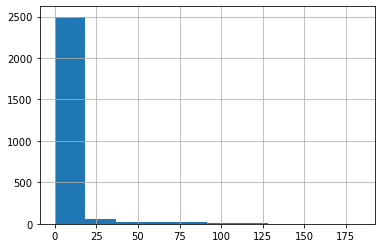

In [79]:
inference_list.TC_t.hist()

In [71]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    
    ci = np.round(h,2)
    mean = np.round(m,2)
    string = str(mean)+ " ! " +str(ci)
    return string

subset = inference_list.loc[inference_list.prefix_number < 7]

df = pd.pivot_table(subset, 
                    index=["prefix_number",'loss_function'], 
                    columns="data", 
                    values="TC_t",
                    aggfunc=mean_confidence_interval)


# change order
df = df[['sepsis', 'helpdesk', 'traffic_fines', 'hospital_billing']]

string = str((df.to_latex(index=True)))
string = string.replace('!', '$\pm$')
string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace('sepsis', 'Sepsis')
string = string.replace('helpdesk', 'Helpdesk')
string = string.replace('traffic\_fines', 'Traffic fines')
string = string.replace('hospital\_billing', 'Hospital billing')

string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")
string = string.replace("& MAE &","& $MAE$ &")



string = string.replace("llllll","|l|l|l|l|l|l|")

string = string.replace("loss\_function","Loss function")

string = string.replace("event\_number","Prefix")
string = string.replace("data","")


df

C:\Users\Mike\AppData\Local\Temp\ipykernel_1932\1397786132.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str((df.to_latex(index=True)))


data                              sepsis     helpdesk  traffic_fines  \
prefix_number loss_function                                            
2             MAE            0.55 ! 0.07   0.3 ! 0.21    0.47 ! 0.48   
              MAE_Etd        0.54 ! 0.17  0.31 ! 0.19    1.54 ! 1.54   
              MAE_Mtd        0.55 ! 0.11  0.33 ! 0.19    1.05 ! 0.65   
              MAE_Ptd          0.6 ! 0.2  0.14 ! 0.12    0.57 ! 0.72   
3             MAE            0.21 ! 0.06  0.27 ! 0.11    2.53 ! 1.68   
              MAE_Etd        0.26 ! 0.07   0.61 ! 0.2    3.33 ! 1.61   
              MAE_Mtd        0.24 ! 0.07  0.51 ! 0.28     3.77 ! 4.7   
              MAE_Ptd        0.28 ! 0.07  0.52 ! 0.39    3.56 ! 1.96   
4             MAE            0.12 ! 0.03  0.23 ! 0.07    2.13 ! 1.42   
              MAE_Etd        0.12 ! 0.02   0.25 ! 0.1    2.63 ! 2.55   
              MAE_Mtd        0.13 ! 0.03   0.3 ! 0.17     2.2 ! 1.79   
              MAE_Ptd        0.15 ! 0.03  0.17 ! 0.11    1.81 ! 1.05   
5             MAE             0.1 ! 0.02  0.25 ! 0.12    2.32 ! 0.61   
              MAE_Etd        0.11 ! 0.03  0.53 ! 0.17    2.61 ! 0.72   
              MAE_Mtd        0.12 ! 0.03  0.55 ! 0.25    3.82 ! 2.71   
              MAE_Ptd        0.13 ! 0.03   0.3 ! 0.21      2.1 ! 1.0   
6             MAE             0.1 ! 0.03   0.3 ! 0.09  59.68 ! 18.26   
              MAE_Etd        0.13 ! 0.03   0.57 ! 0.2  68.99 ! 11.26   
              MAE_Mtd        0.13 ! 0.03  0.71 ! 0.33  52.58 ! 14.37   
              MAE_Ptd        0.13 ! 0.04  0.55 ! 0.32  62.28 ! 17.65   

data                        hospital_billing  
prefix_number loss_function                   
2             MAE                2.18 ! 0.38  
              MAE_Etd            2.06 ! 0.33  
              MAE_Mtd            2.09 ! 0.42  
              MAE_Ptd            2.04 ! 0.38  
3             MAE                1.16 ! 0.21  
              MAE_Etd            1.38 ! 0.26  
              MAE_Mtd             1.29 ! 0.2  
              MAE_Ptd             1.34 ! 0.3  
4             MAE                 1.5 ! 0.22  
              MAE_Etd            1.51 ! 0.26  
              MAE_Mtd            1.57 ! 0.25  
              MAE_Ptd            1.79 ! 0.34  
5             MAE                2.08 ! 0.34  
              MAE_Etd            2.55 ! 0.74  
              MAE_Mtd            2.29 ! 0.44  
              MAE_Ptd             2.7 ! 0.88  
6             MAE                 6.4 ! 0.85  
              MAE_Etd            6.14 ! 0.71  
              MAE_Mtd            6.09 ! 1.01  
              MAE_Ptd            6.36 ! 0.99

In [72]:
print(string)

\begin{tabular}{|l|l|l|l|l|l|}
\hline
  &  &       Sepsis &     Helpdesk &  Traffic fines & Hospital billing \\
prefix\_number & Loss function &              &              &                &                  \\
\hline
2 & $MAE$ &  0.55 $\pm$ 0.07 &   0.3 $\pm$ 0.21 &    0.47 $\pm$ 0.48 &      2.18 $\pm$ 0.38 \\
  & $MAE_{EtD}$ &  0.54 $\pm$ 0.17 &  0.31 $\pm$ 0.19 &    1.54 $\pm$ 1.54 &      2.06 $\pm$ 0.33 \\
  & $MAE_{MtD}$ &  0.55 $\pm$ 0.11 &  0.33 $\pm$ 0.19 &    1.05 $\pm$ 0.65 &      2.09 $\pm$ 0.42 \\
  & $MAE_{PtD}$ &    0.6 $\pm$ 0.2 &  0.14 $\pm$ 0.12 &    0.57 $\pm$ 0.72 &      2.04 $\pm$ 0.38 \\
3 & $MAE$ &  0.21 $\pm$ 0.06 &  0.27 $\pm$ 0.11 &    2.53 $\pm$ 1.68 &      1.16 $\pm$ 0.21 \\
  & $MAE_{EtD}$ &  0.26 $\pm$ 0.07 &   0.61 $\pm$ 0.2 &    3.33 $\pm$ 1.61 &      1.38 $\pm$ 0.26 \\
  & $MAE_{MtD}$ &  0.24 $\pm$ 0.07 &  0.51 $\pm$ 0.28 &     3.77 $\pm$ 4.7 &       1.29 $\pm$ 0.2 \\
  & $MAE_{PtD}$ &  0.28 $\pm$ 0.07 &  0.52 $\pm$ 0.39 &    3.56 $\pm$ 1.96 &       1.3

## F-test

In [73]:
datasets = ['sepsis', 'helpdesk', 'traffic_fines', 'hospital_billing']
loss_functions = ['MAE_Mtd', 'MAE_Ptd', 'MAE_Etd']

prefixes = [2,3,4,5,6]

res = {"event_log":[],
       "prefix":[],
      "loss_function":[],
      "f_value":[],
      "p_value":[]}

#do a comparison for each dataset
for dataset in datasets:
    results_1 = inference_list.loc[inference_list.data == dataset]
    
    # do a comparison for each prefix
    for prefix in prefixes:
        results = results_1.loc[results_1.prefix_number == prefix]
    
        #do a comparison with MAE for each of the three losses
        for loss in loss_functions:

            #get MAE vectors, n = 10
            baseline = results.loc[results.loss_function == "MAE","TC_t"]
            loss_i = results.loc[results.loss_function == loss,"TC_t"]

            #perform f_test:
            f_value, p_value = f_test(baseline.values, loss_i.values, log_trans=False)

            #append results
            res["event_log"].append(dataset)
            res["prefix"].append(prefix)
            res["loss_function"].append(loss)
            res["f_value"].append(np.round(f_value,decimals=3))
            res["p_value"].append(np.round(p_value,decimals=3))
res = pd.DataFrame(res)

Highlighting f-test results is done manually by looking up datasets below

In [77]:
res.loc[res.event_log == "hospital_billing"]

,event_log,prefix,loss_function,f_value,p_value
45,hospital_billing,2,MAE_Mtd,0.791,0.634
46,hospital_billing,2,MAE_Ptd,0.981,0.511
47,hospital_billing,2,MAE_Etd,1.275,0.362
48,hospital_billing,3,MAE_Mtd,1.103,0.443
49,hospital_billing,3,MAE_Ptd,0.494,0.846
50,hospital_billing,3,MAE_Etd,0.693,0.703
51,hospital_billing,4,MAE_Mtd,0.748,0.664
52,hospital_billing,4,MAE_Ptd,0.413,0.898
53,hospital_billing,4,MAE_Etd,0.690,0.705
54,hospital_billing,5,MAE_Mtd,0.584,0.783


# TC_t all prefixes

C:\Users\Mike\AppData\Local\Temp\ipykernel_1932\3166914564.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


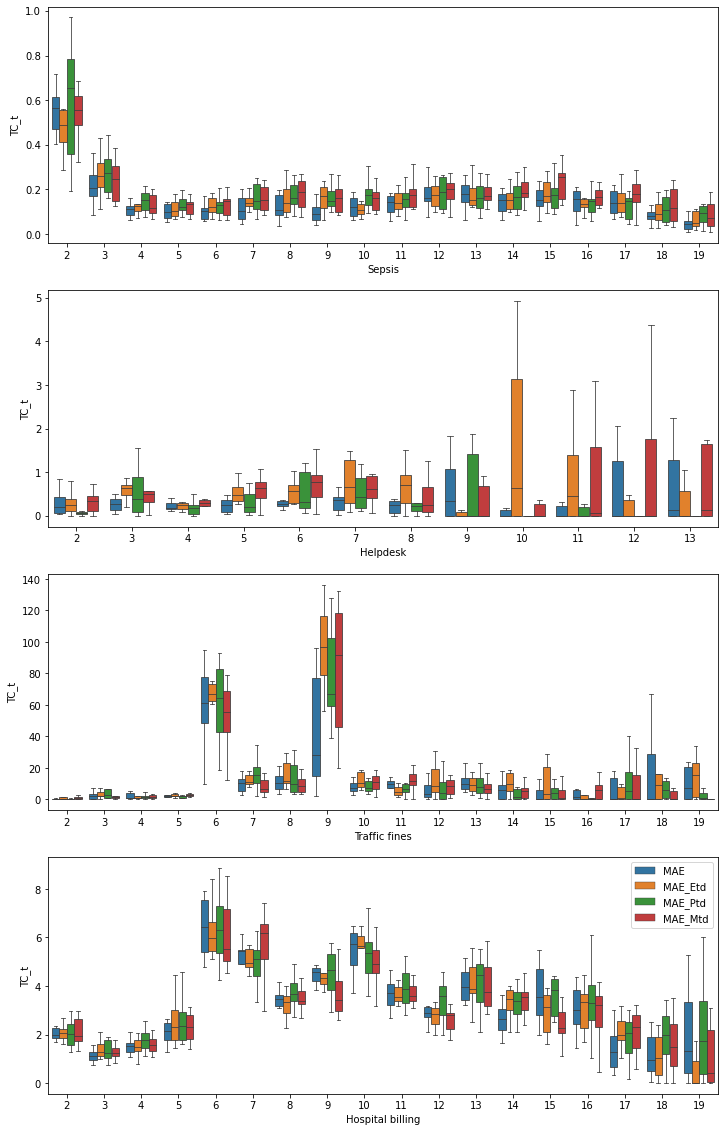

In [60]:
fig, ax = plt.subplots(4, figsize=(12, 20))

metric = "TC_t"
xaxis = "prefix_number"
hue = "loss_function"

hue_order = ['MAE','MAE_Etd', 'MAE_Ptd', 'MAE_Mtd']

fliersize = 1
width = 0.8
lwidth = 0.8

# Exclude some results
inference_list = inference_list.loc[inference_list.prefix_number != 1]

sepsis = inference_list.loc[inference_list.data == "sepsis"]

sns.boxplot(x=sepsis[xaxis], 
            y=sepsis[metric],
            hue=sepsis[hue],
            hue_order = hue_order,
            #saturation=0.5,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=lwidth,
            whis=1.5, 
            ax=ax[0])



helpdesk = inference_list.loc[inference_list.data == "helpdesk"]

sns.boxplot(x=helpdesk[xaxis], 
            y=helpdesk[metric],
            hue=helpdesk[hue],
            hue_order = hue_order,
            #saturation=0.5,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=lwidth,
            whis=1.5, 
            ax=ax[1])


traffic_fines = inference_list.loc[inference_list.data == "traffic_fines"]

sns.boxplot(x=traffic_fines[xaxis], 
            y=traffic_fines[metric],
            hue=traffic_fines[hue],
            hue_order = hue_order,
            #saturation=0.5,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=lwidth,
            whis=1.5, 
            ax=ax[2])

hospital_billing = inference_list.loc[inference_list.data == "hospital_billing"]

sns.boxplot(x=hospital_billing[xaxis], 
            y=hospital_billing[metric],
            hue=hospital_billing[hue],
            hue_order = hue_order,
            #saturation=0.5,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=lwidth,
            whis=1.5, 
            ax=ax[3])


ax[0].set(xlabel='Sepsis', ylabel=metric)#, xlim=[-0.5,6])
ax[0].legend([],[], frameon=False)
ax[1].set(xlabel='Helpdesk', ylabel=metric)#, xlim=[-0.5,6])
ax[1].legend([],[], frameon=False)
ax[2].set(xlabel='Traffic fines', ylabel=metric)#, xlim=[-0.5,6])
ax[2].legend([],[], frameon=False)
ax[3].set(xlabel='Hospital billing', ylabel=metric)#, xlim=[-0.5,6])
ax[3].legend(loc='upper right')

plt.savefig("TC_t.png", dpi=300, bbox_inches = "tight")

fig.show()

# TC_t by trace length

In [61]:
def get_max_prefix(inf_test):
    
    inf_i = inf_test.groupby('caseid')['prefix_number'].max().reset_index()
    inf_i.columns = ["caseid","n_events"]
    out = inf_test.merge(inf_i, on="caseid", how="left")
    
    return out

In [62]:
inference_list = []

for i in experiments.RUN:
    #Load data objects to get the inference table
    file = "experiment_"+str(i)
    with open('../results/'+file+'.pickle', 'rb') as handle:
        data_objects = pickle.load(handle)
    print(file)
    
    # get inference table for MAE calculation
    inf_test = data_objects["inference_test"]
    
       
    # get actual trace lengths
    inf_test = get_max_prefix(inf_test)
    
    
    #Crosstab TC_t by trace length    
    pivottable = pd.pivot_table(inf_test, 
                                    values="TC_t",
                                    columns=['n_events'], 
                                    aggfunc=np.mean).T
    
    pivottable = pivottable.reset_index()
        
    #mark with needed information
    pivottable["data"] = data_objects['curr_settings']["data"]
    pivottable["loss_function"] = data_objects['curr_settings']["loss_function"]
    
        
    inference_list.append(pivottable)
    

experiment_0
experiment_1
experiment_2
experiment_3
experiment_4
experiment_5
experiment_6
experiment_7
experiment_8
experiment_9
experiment_10
experiment_11
experiment_12
experiment_13
experiment_14
experiment_15
experiment_16
experiment_17
experiment_18
experiment_19
experiment_20
experiment_21
experiment_22
experiment_23
experiment_24
experiment_25
experiment_26
experiment_27
experiment_28
experiment_29
experiment_30
experiment_31
experiment_32
experiment_33
experiment_34
experiment_35
experiment_36
experiment_37
experiment_38
experiment_39
experiment_40
experiment_41
experiment_42
experiment_43
experiment_44
experiment_45
experiment_46
experiment_47
experiment_48
experiment_49
experiment_50
experiment_51
experiment_52
experiment_53
experiment_54
experiment_55
experiment_56
experiment_57
experiment_58
experiment_59
experiment_60
experiment_61
experiment_62
experiment_63
experiment_64
experiment_65
experiment_66
experiment_67
experiment_68
experiment_69
experiment_70
experiment_71
ex

In [63]:
inference_list = pd.concat(inference_list)

C:\Users\Mike\AppData\Local\Temp\ipykernel_1932\2471562210.py:78: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


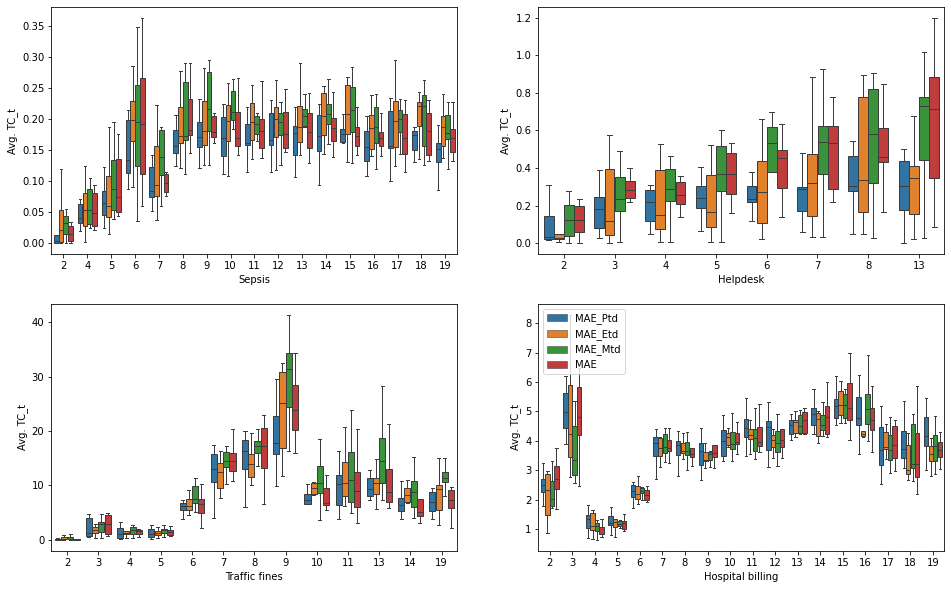

In [64]:
fig, ax = plt.subplots(2,2, figsize=(16, 10))

metric = "TC_t"
xaxis = "n_events"
hue = "loss_function"

# Exclude some results
results_table = inference_list

sepsis = results_table.loc[results_table.data == "sepsis"]

sns.boxplot(x=sepsis[xaxis], 
            y=sepsis[metric],
            hue=sepsis[hue],
            #saturation=0.5,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5, 
            ax=ax[0,0])



helpdesk = results_table.loc[results_table.data == "helpdesk"]

sns.boxplot(x=helpdesk[xaxis], 
            y=helpdesk[metric],
            hue=helpdesk[hue],
            #saturation=0.5,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5, 
            ax=ax[0,1])


traffic_fines = results_table.loc[results_table.data == "traffic_fines"]

sns.boxplot(x=traffic_fines[xaxis], 
            y=traffic_fines[metric],
            hue=traffic_fines[hue],
            #saturation=0.5,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5, 
            ax=ax[1,0])

hospital_billing = results_table.loc[results_table.data == "hospital_billing"]

sns.boxplot(x=hospital_billing[xaxis], 
            y=hospital_billing[metric],
            hue=hospital_billing[hue],
            #saturation=0.5,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5, 
            ax=ax[1,1])


ax[0,0].set(xlabel='Sepsis', ylabel='Avg. TC_t')#, xlim=[-0.5,6])
ax[0,0].legend([],[], frameon=False)
ax[0,1].set(xlabel='Helpdesk', ylabel='Avg. TC_t')#, xlim=[-0.5,6])
ax[0,1].legend([],[], frameon=False)
ax[1,0].set(xlabel='Traffic fines', ylabel='Avg. TC_t')#, xlim=[-0.5,6])
ax[1,0].legend([],[], frameon=False)
ax[1,1].set(xlabel='Hospital billing', ylabel='Avg. TC_t')#, xlim=[-0.5,6])
ax[1,1].legend(loc='upper left')


plt.savefig("TC_t_i.png", dpi=300, bbox_inches = "tight")

fig.show()

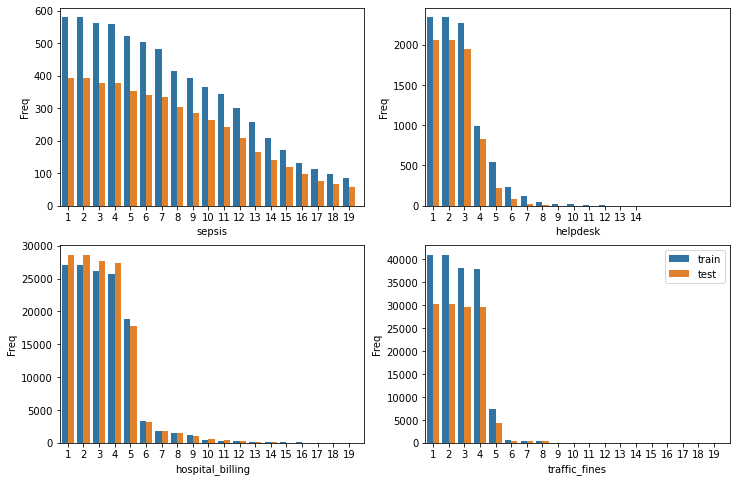